<a href="https://colab.research.google.com/github/leonardogfrodrigues/desafio-tecnico/blob/main/desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Técnico - Americanas SA**

Leonardo G. F. Rodrigues

https://www.linkedin.com/in/leonardogfrodrigues/

leonardogfrodrigues@gmail.com


---

O desafio foi desenvolvido em linguagen Python (versão 3.7.13) e foi executado em nuvem por meio do ambiente Google Colaboratory. 

## Análise Exploratória dos Dados

O conjunto de dados é analisado e suas principais características são sumarizadas através de diferentes visualizações.

Importando o conjunto de dados direto do Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/MyDrive/dataset_cdjr.parquet.gzip'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importação das bibliotecas necessárias

In [2]:
# Visualizações e manipulação dos dados
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Preparação dos Dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Modelagem
import random
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import itertools
from sklearn.metrics import confusion_matrix, classification_report

Leitura dos Dados

In [3]:
df = pd.read_parquet(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 337 to 92
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   466 non-null    float64
 1   feature1   466 non-null    int64  
 2   feature2   466 non-null    float64
 3   feature3   466 non-null    float64
 4   feature4   466 non-null    float64
 5   feature5   466 non-null    float64
 6   feature6   466 non-null    int64  
 7   feature7   466 non-null    float64
 8   feature8   466 non-null    float64
 9   feature9   466 non-null    int64  
 10  feature10  466 non-null    float64
 11  feature11  466 non-null    float64
 12  feature12  466 non-null    float64
 13  feature13  466 non-null    float64
 14  feature14  466 non-null    float64
 15  feature15  466 non-null    int64  
 16  target     466 non-null    int64  
dtypes: float64(12), int64(5)
memory usage: 65.5 KB


Verificando se há valores faltantes

In [4]:
print("Valores faltantes:", df.isnull().values.any())

Valores faltantes: False


Visualizando os dados

In [5]:
df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850000,0.009198,94.611429,7,0
266,150.0,2,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000000,0.000000,0.000000,0,1
236,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525000,0.095238,86.520000,4,0
274,100.0,2,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000000,0.000000,0.000000,0,1
208,50.0,1,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500000,0.004367,87.560000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1300.0,7,12133.73,244.30,-1081.90,0.395307,2642,0.008152,11.617895,324081,17343.28,0.699621,12.893827,0.030659,149.799136,81,0
175,350.0,1,0.00,-1.99,-351.99,0.684805,514,0.004000,0.000000,128499,2263.65,0.000000,0.000000,0.000000,0.000000,0,1
417,400.0,4,1100.07,-18.20,-438.60,0.748464,586,0.003683,2.508140,159109,5303.10,0.207439,62.657143,0.011945,157.152857,7,0
131,150.0,1,0.00,114.30,-35.70,0.300000,119,0.003834,0.000000,31040,334.59,0.000000,0.000000,0.000000,0.000000,0,0


Visualizando os dados sem a coluna "target" que corresponde as classes do conjunto de dados

In [6]:
df2 = df.drop(labels='target', axis=1)
df2

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850000,0.009198,94.611429,7
266,150.0,2,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000000,0.000000,0.000000,0
236,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525000,0.095238,86.520000,4
274,100.0,2,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000000,0.000000,0.000000,0
208,50.0,1,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500000,0.004367,87.560000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1300.0,7,12133.73,244.30,-1081.90,0.395307,2642,0.008152,11.617895,324081,17343.28,0.699621,12.893827,0.030659,149.799136,81
175,350.0,1,0.00,-1.99,-351.99,0.684805,514,0.004000,0.000000,128499,2263.65,0.000000,0.000000,0.000000,0.000000,0
417,400.0,4,1100.07,-18.20,-438.60,0.748464,586,0.003683,2.508140,159109,5303.10,0.207439,62.657143,0.011945,157.152857,7
131,150.0,1,0.00,114.30,-35.70,0.300000,119,0.003834,0.000000,31040,334.59,0.000000,0.000000,0.000000,0.000000,0


Verificando o tamanho do conjunto de dados

In [7]:
df.shape

(466, 17)

Exibindo os atributos do conjunto de dados

In [8]:
print(df.columns)

Index(['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
       'feature11', 'feature12', 'feature13', 'feature14', 'feature15',
       'target'],
      dtype='object')


Exibição das estatísticas descritivas considerando duas casas decimais

In [9]:
df.describe().round(2)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00
mean,438.74,4.85,1244.32,44.60,-434.30,0.47,979.07,0.11,3.86,216437.82,6930.46,0.44,61.89,0.01,87.71,10.31,0.56
std,984.59,6.84,3558.70,122.09,975.56,0.45,1460.74,1.87,15.61,350862.17,17581.80,3.44,142.52,0.02,145.43,33.63,0.50
min,0.00,0.00,0.00,-645.87,-15506.35,0.15,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50.00,1.00,0.00,-0.40,-492.04,0.17,133.50,0.00,0.00,21131.00,383.69,0.00,0.00,0.00,0.00,0.00,0.00
50%,150.00,2.00,169.83,18.36,-154.52,0.30,420.00,0.01,0.94,85328.50,1410.86,0.08,19.69,0.00,72.52,2.00,1.00
75%,500.00,6.00,1017.38,44.63,-50.18,0.57,1238.75,0.01,2.82,264503.50,5212.98,0.31,65.50,0.01,127.30,8.00,1.00
max,15400.00,31.00,40291.24,1521.90,-0.26,3.15,11731.00,40.00,281.67,3366472.00,237182.78,73.08,2232.10,0.20,2154.00,541.00,1.00


Histograma para visualização da distribuição de frequências dos atributos

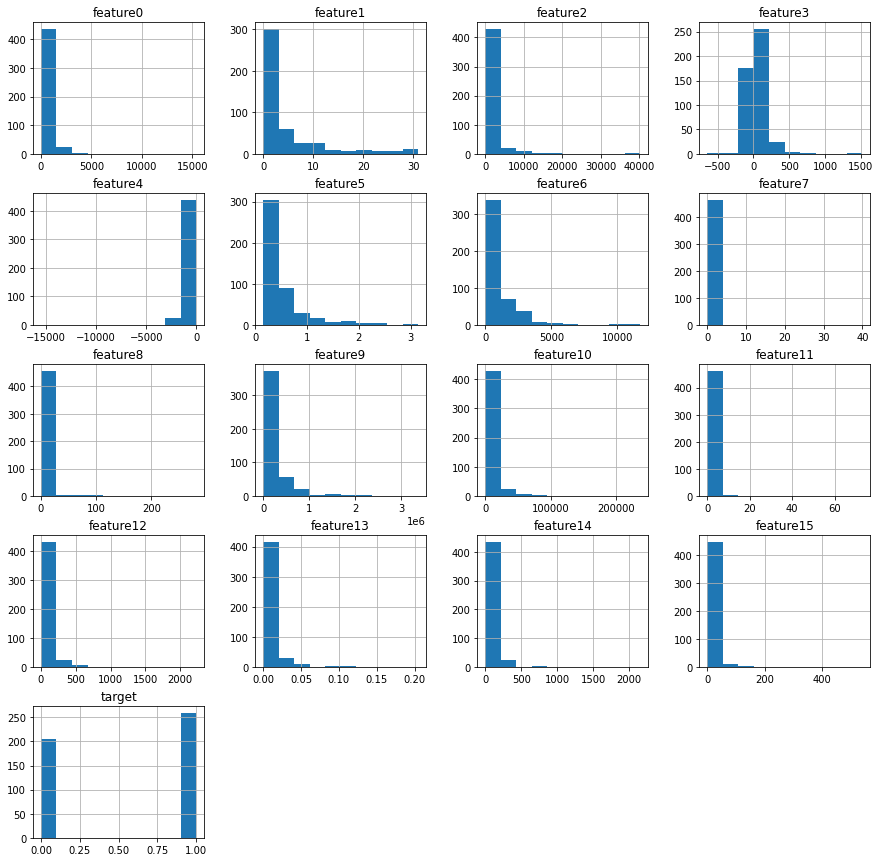

In [10]:
df.hist(figsize=(15, 15))
plt.show()

**Matriz de Correlação**

O coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.

Em modelos de regressão linear, é importante verificarmos se as variáveis explicativas (X's) têm forte correlação com a variável dependente (Y) e se as variáveis explicativas (X's) não tenham forte correlação entre si.

In [11]:
df2.corr() #Exibição da correlação sem a coluna "target"

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15
feature0,1.000000,0.578231,0.789706,0.198977,-0.992029,0.183311,0.774646,-0.025410,-0.020315,0.610831,0.452541,0.097989,0.137433,0.121364,0.204741,0.860868
feature1,0.578231,1.000000,0.444309,-0.076819,-0.583406,0.177083,0.662409,-0.040651,-0.043260,0.677923,0.399257,0.083523,0.233305,0.059067,0.292515,0.406480
feature2,0.789706,0.444309,1.000000,0.108691,-0.800813,0.048085,0.709912,-0.018119,0.132372,0.491464,0.670302,0.222864,-0.019028,0.340084,0.214562,0.869099
feature3,0.198977,-0.076819,0.108691,1.000000,-0.128933,-0.066175,0.179833,-0.004396,0.045513,0.058322,0.068300,-0.006780,-0.083768,0.070714,-0.000804,0.123163
feature4,-0.992029,-0.583406,-0.800813,-0.128933,1.000000,-0.185828,-0.776422,0.025066,0.026514,-0.618550,-0.452139,-0.099546,-0.156013,-0.115017,-0.216575,-0.867045
feature5,0.183311,0.177083,0.048085,-0.066175,-0.185828,1.000000,-0.058442,-0.041284,-0.087881,0.036884,0.091967,-0.005897,0.185243,-0.002519,0.085943,0.050334
feature6,0.774646,0.662409,0.709912,0.179833,-0.776422,-0.058442,1.000000,-0.036110,-0.021067,0.772431,0.452850,0.120623,0.122642,0.071417,0.204314,0.688423
feature7,-0.025410,-0.040651,-0.018119,-0.004396,0.025066,-0.041284,-0.036110,1.000000,-0.009083,-0.036081,-0.020044,-0.007061,-0.025163,-0.020022,-0.032848,-0.016011
feature8,-0.020315,-0.043260,0.132372,0.045513,0.026514,-0.087881,-0.021067,-0.009083,1.000000,-0.054245,0.087770,0.026461,-0.068014,0.681254,0.284515,0.092604
feature9,0.610831,0.677923,0.491464,0.058322,-0.618550,0.036884,0.772431,-0.036081,-0.054245,1.000000,0.359134,0.066881,0.322274,-0.009987,0.304573,0.405209


**Visualização da Matriz de Correlação**

A variável "corr" recebe a matriz de correlação acima.
A variável "mask" recebe o método de criação de uma máscara para "esconder" os dados da matriz de correlação que não são interessantes para nossa análise preliminar.

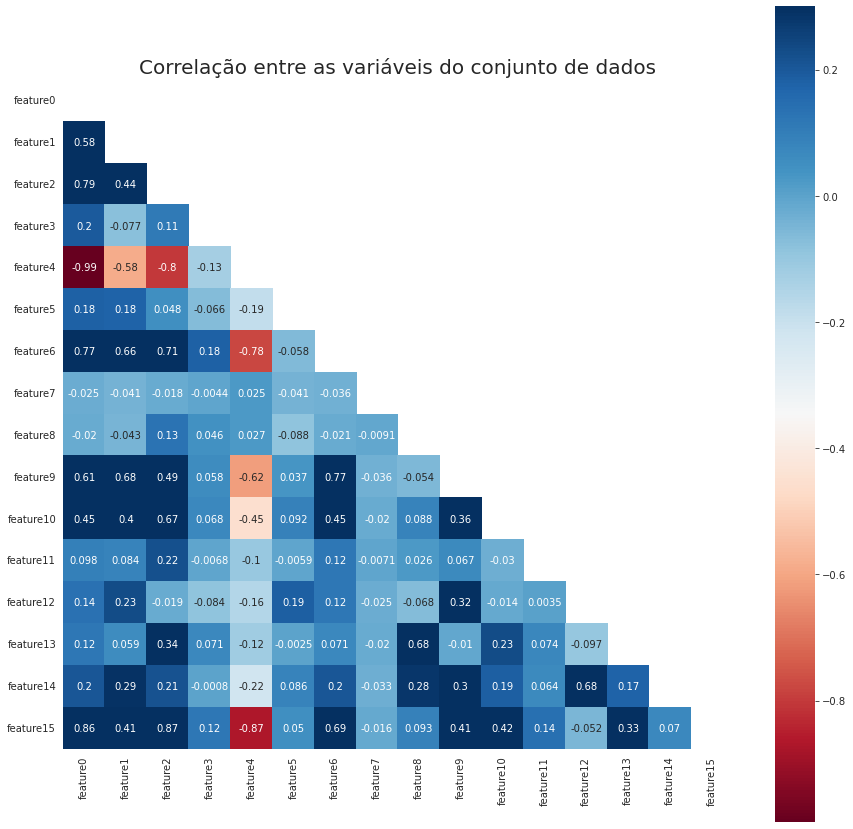

In [12]:
corr = df2.corr()   
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=.3, square=True, annot=True)
    plt.title('Correlação entre as variáveis do conjunto de dados', fontsize=20)

Observações:

**- Forte Correlação Positiva:** 
- feature0 e feature15
- feature2 e feature15

**- Forte Correlação Negativa:** 
- feature0 e feature4
- feature2 e feature4
- feature4 e feature6

Distribuição das classes no conjunto de dados

In [13]:
num_true = len(df.loc[df['target'] == 0])
num_false = len(df.loc[df['target'] == 1])

print("Classe 0:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Classe 1: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Classe 0:  206 (44.21%)
Classe 1: 260 (55.79%)


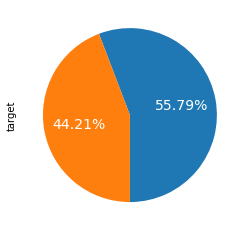

In [14]:
df['target'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=270, fontsize=14,textprops=dict(color="w"))
ax.legend([df.loc[df['target']] == 0],title="Classes", loc="center left")

## Preparação dos Dados

**- Atribuição:** dados em X e rótulos em y

**- Eliminação da coluna target:** não é correto realizar a classificação considerando o alvo (classe) como atributo

**- Distribuição:** 75% para treino e 25% para teste

**- Normalização:** aplicada para manter a integridade dos dados e contribuir com o desempenho da modelagem. Além disso, evita que valores discrepantes sejam mal distribuídos, mudando esses valores para uma escala comum, que combine com o conjunto.

In [15]:
X= df.iloc[: , 0:-1]

# print(X.head()) # Para o treino devem ser consideradas feature0, feature1, ..., feature15. 

y= df['target']

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size=0.75, test_size=0.25,random_state=42)

print("Amostras de Treinamento: ")
print(train_x.shape)


# Amostra de teste para avaliação da entrega do modelo
X_final= test_x.iloc[110]
y_final = test_y.iloc[110]
print(X_final)
print(y_final)

Amostras de Treinamento: 
(349, 16)
feature0        400.000000
feature1          8.000000
feature2        585.800000
feature3        -12.980000
feature4       -406.100000
feature5          0.466782
feature6        870.000000
feature7          0.003899
feature8          1.442502
feature9     223127.000000
feature10      1390.520000
feature11         0.421281
feature12        67.683333
feature13         0.006897
feature14        97.633333
feature15         6.000000
Name: 497, dtype: float64
1


In [16]:
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(train_x.values)
x_test =  scaler.fit_transform(test_x.values)

print("Valores normalizados para o conjunto de treinamento:")
print(x_train)
print("Valores normalizados para o conjunto de teste:")
print(x_test)

Valores normalizados para o conjunto de treinamento:
[[0.00649351 0.06451613 0.00899501 ... 0.09476805 0.02403634 0.012939  ]
 [0.00974026 0.09677419 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.01298701 0.06451613 0.0045665  ... 0.00890223 0.08541783 0.00184843]
 [0.00649351 0.06451613 0.00153607 ... 0.07405036 0.02873259 0.00184843]
 [0.00324675 0.03225806 0.02220334 ... 0.04412934 0.10383008 0.00739372]]
Valores normalizados para o conjunto de teste:
[[0.37209302 0.25806452 0.2566276  ... 0.10888554 0.08030424 0.31428571]
 [0.02325581 0.03225806 0.         ... 0.         0.         0.        ]
 [0.06976744 0.09677419 0.00707944 ... 0.01061004 0.07310514 0.00952381]
 ...
 [0.04651163 0.06451613 0.         ... 0.         0.         0.        ]
 [0.09302326 0.12903226 0.13856168 ... 0.17704966 0.05723375 0.23809524]
 [0.04651163 0.06451613 0.2338267  ... 0.32809203 0.12072943 0.19047619]]


## Modelagem
Para a classificação foi proposto um MultiLayer-Perceptron (MLP) chamado AmericanasModel, o MLP foi escolhido devido à sua robustez em tarefas de classificação.


Travamento das sementes para garantir a reprodutibilidade do experimento

In [17]:
torch.use_deterministic_algorithms(True)
torch.manual_seed(0)
random.seed(0)

Converter os conjuntos de treino e teste para estrutura de dados do tipo tensor

In [18]:
x_tensor =  torch.from_numpy(x_train).float()
y_tensor =  torch.from_numpy(train_y.values.ravel()).float()
xtest_tensor =  torch.from_numpy(x_test).float()
ytest_tensor =  torch.from_numpy(test_y.values.ravel()).float()

print("Treino convertido para Tensor")
print(x_tensor)
print(y_tensor)
print("Teste convertido para Tensor")
print(xtest_tensor)
print(ytest_tensor)

Treino convertido para Tensor
tensor([[0.0065, 0.0645, 0.0090,  ..., 0.0948, 0.0240, 0.0129],
        [0.0097, 0.0968, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0130, 0.0645, 0.0046,  ..., 0.0089, 0.0854, 0.0018],
        [0.0065, 0.0645, 0.0015,  ..., 0.0741, 0.0287, 0.0018],
        [0.0032, 0.0323, 0.0222,  ..., 0.0441, 0.1038, 0.0074]])
tensor([1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
        0., 

- Definir o tamanho do batch, ou seja, número de exemplos de treinamento usados em uma iteração

- Combinar `x_train` e `y_train` em um único tensor para facilitar a iteração durante o treinamento

- Realizar a iteração entre os batches por meio do `DataLoader`

In [19]:
bs = 64

y_tensor = y_tensor.unsqueeze(1)
train_ds = TensorDataset(x_tensor, y_tensor)
train_dl = DataLoader(train_ds, batch_size=bs)

ytest_tensor = ytest_tensor.unsqueeze(1)
test_ds = TensorDataset(xtest_tensor, ytest_tensor)
test_loader = DataLoader(test_ds, batch_size=32)

Definição do MLP **AmericanasModel**

- 2 hidden layers (camadas ocultas);
- Batch Normalization e função ReLU entre cada camada;
- Função dropout para regularizar os dados enviados à camada de saída;
- 1 camada de saída Sigmódie para o cálculo das probabilidades entre zero e um (0 e 1).

In [20]:
# Dimensão da entrada 
n_input_dim = train_x.shape[1]

#print(n_input_dim)

# Tamanho da camada
n_hidden1 = 300  # Número de unidades ocultas
n_hidden2 = 100
n_output =  1   # Número de nós de saída = para classificador binário


class AmericanasModel(nn.Module):
    def __init__(self):
        super(AmericanasModel, self).__init__()
        self.layer_1 = nn.Linear(n_input_dim, n_hidden1) 
        self.layer_2 = nn.Linear(n_hidden1, n_hidden2)
        self.layer_out = nn.Linear(n_hidden2, n_output) 
        
        
        self.relu = nn.ReLU()
        self.sigmoid =  nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden1)
        self.batchnorm2 = nn.BatchNorm1d(n_hidden2)
        
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.sigmoid(self.layer_out(x))
        
        return x
    

model = AmericanasModel()
print(model)

AmericanasModel(
  (layer_1): Linear(in_features=16, out_features=300, bias=True)
  (layer_2): Linear(in_features=300, out_features=100, bias=True)
  (layer_out): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


Definição de Parâmetros:

-**Função de Custo:** entropia cruzada binária

-**Taxa de Aprendizado:** 0.001

-**Otimizador:** Adam

-**Épocas de Treinamento:** 100

In [21]:
# Função de Custo (loss)
loss_func = nn.BCELoss()

# Taxa de Aprendizado
learning_rate = 0.001

# Otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Épocas de Treinamento
epochs = 100

## Avaliação da performance do modelo
O modelo foi treinado e testado com o MLP AmericanasModel, por 100 épocas.
Foi avaliado utilizando os índices VP, VN, FP e FN obtidos da matriz de confusão. Posteriormente, esses índices foram utilizados para verificar a performance do modelo em termos de Acurácia, Precisão, Recall, e F1-Score. 


In [22]:
model.train()
train_loss = []

for epoch in range(epochs):
    # Dentro de cada época, executar os subconjuntos de dados = tamanhos do batch
    for xb, yb in train_dl:
        y_pred = model(xb)            # Propagação Forward 
        loss = loss_func(y_pred, yb)  # Função de custo
        optimizer.zero_grad()         # Limpando todos os gradientes anteriores, definindo como zero
        loss.backward()               # Back Propagation
        optimizer.step()              # Atualizando os parâmeteros
    #print("Loss na iteração :"+str(epoch)+" é: "+str(loss.item()))
    train_loss.append(loss.item())
torch.save(model.state_dict(), 'americanas.pth')
print('Last iteration loss value: '+str(loss.item()))

Last iteration loss value: 0.0073728132992982864


Visualização do aprendizado da rede AmericanasModel

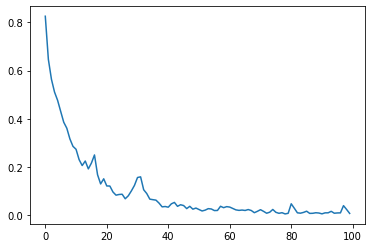

In [23]:
plt.plot(train_loss)
plt.show()

Avaliação do Modelo

In [24]:
y_pred_list = []
model.eval()

#Como não precisamos do modelo para propagar de volta os gradientes no conjunto de teste, usamos torch.no_grad()
# reduz o uso de memória e acelera a computação
with torch.no_grad():
    for xb_test,yb_test  in test_loader:
        y_test_pred = model(xb_test)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.detach().numpy())

# Os arrays são colocados em uma lista para cada batch        
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
# As listas são colocadas em sequência
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))

In [25]:
y_true_test = test_y.values.ravel()
conf_matrix = confusion_matrix(y_true_test ,ytest_pred)
print(conf_matrix)

print("Relatório da Classificação: ","\n\n",classification_report(y_true_test, ytest_pred, digits=4))

[[42 15]
 [22 38]]
Relatório da Classificação:  

               precision    recall  f1-score   support

           0     0.6562    0.7368    0.6942        57
           1     0.7170    0.6333    0.6726        60

    accuracy                         0.6838       117
   macro avg     0.6866    0.6851    0.6834       117
weighted avg     0.6874    0.6838    0.6831       117



## Entrega do Modelo

O modelo é salvo em formato .pth e é carregado para avaliar uma amostra aleatória de teste. Esse modelo salvo poderá ser utilizado para criação de APIs preditoras. 

In [26]:
model.load_state_dict(torch.load('americanas.pth'))

y_pred_list = []
model.eval()

# Variável iteradora 
i=0

with torch.no_grad():
    for xb_test,yb_test  in test_loader:
        y_test_pred = model(xb_test)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.detach().numpy())

        i=i+1

        if(i==1):

          # Os arrays são colocados em uma lista para cada batch        
          y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
          # As listas são colocadas em sequência
          ytest_pred = list(itertools.chain.from_iterable(y_pred_list))

          xb_test.cpu().detach().numpy()
          print("Tensor de Entrada de Teste:", xb_test[0])
          print("Valor predito:", y_pred_list[0][22])
          print("Valor real:", ytest_pred[22])
          break;


Tensor de Entrada de Teste: tensor([0.3721, 0.2581, 0.2566, 0.6105, 0.6849, 0.0619, 0.4570, 0.0220, 0.0703,
        0.0933, 0.1244, 0.1058, 0.0350, 0.1089, 0.0803, 0.3143])
Valor predito: 1.0
Valor real: 1.0


Visualização do funcionamento do MLP AmericanasModel

In [27]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


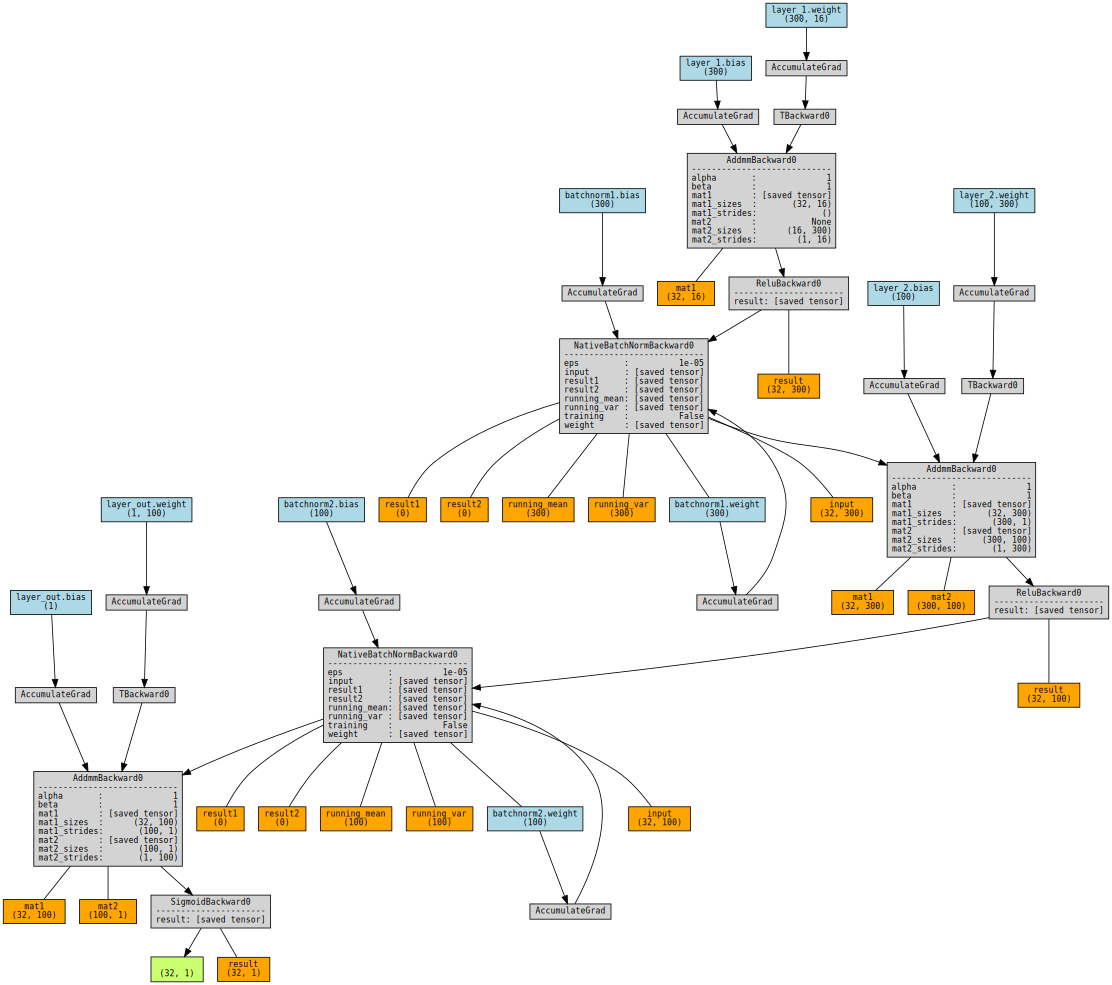

In [28]:
from torchviz import make_dot, make_dot_from_trace

make_dot(model(xb_test), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)
#dot.format = 'png'
#dot.render('torchviz-sample')